In [6]:
from windisch import *

In [7]:
update_input_parameters()
tip = TurbinesInputParameters()
tip.static()
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={
        #"year": [2020, 2030],
        "size": [1000, 3000, 8000, 12000, 16000],
        "application": [
        #    "onshore",
            "offshore"
        ],
    }
)
fp = "extra data/era5_mean_2013-2022_month_by_hour_corrected.nc"
wt = WindTurbineModel(
    array,
    #location=(55.0, 12.7),
    #wind_data=xr.open_dataset(fp),
    country="DK"
)
wt.set_all()

In [8]:
inv = Inventory(wt)

In [9]:
res = inv.calculate_impacts()

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_10742/3270628714.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


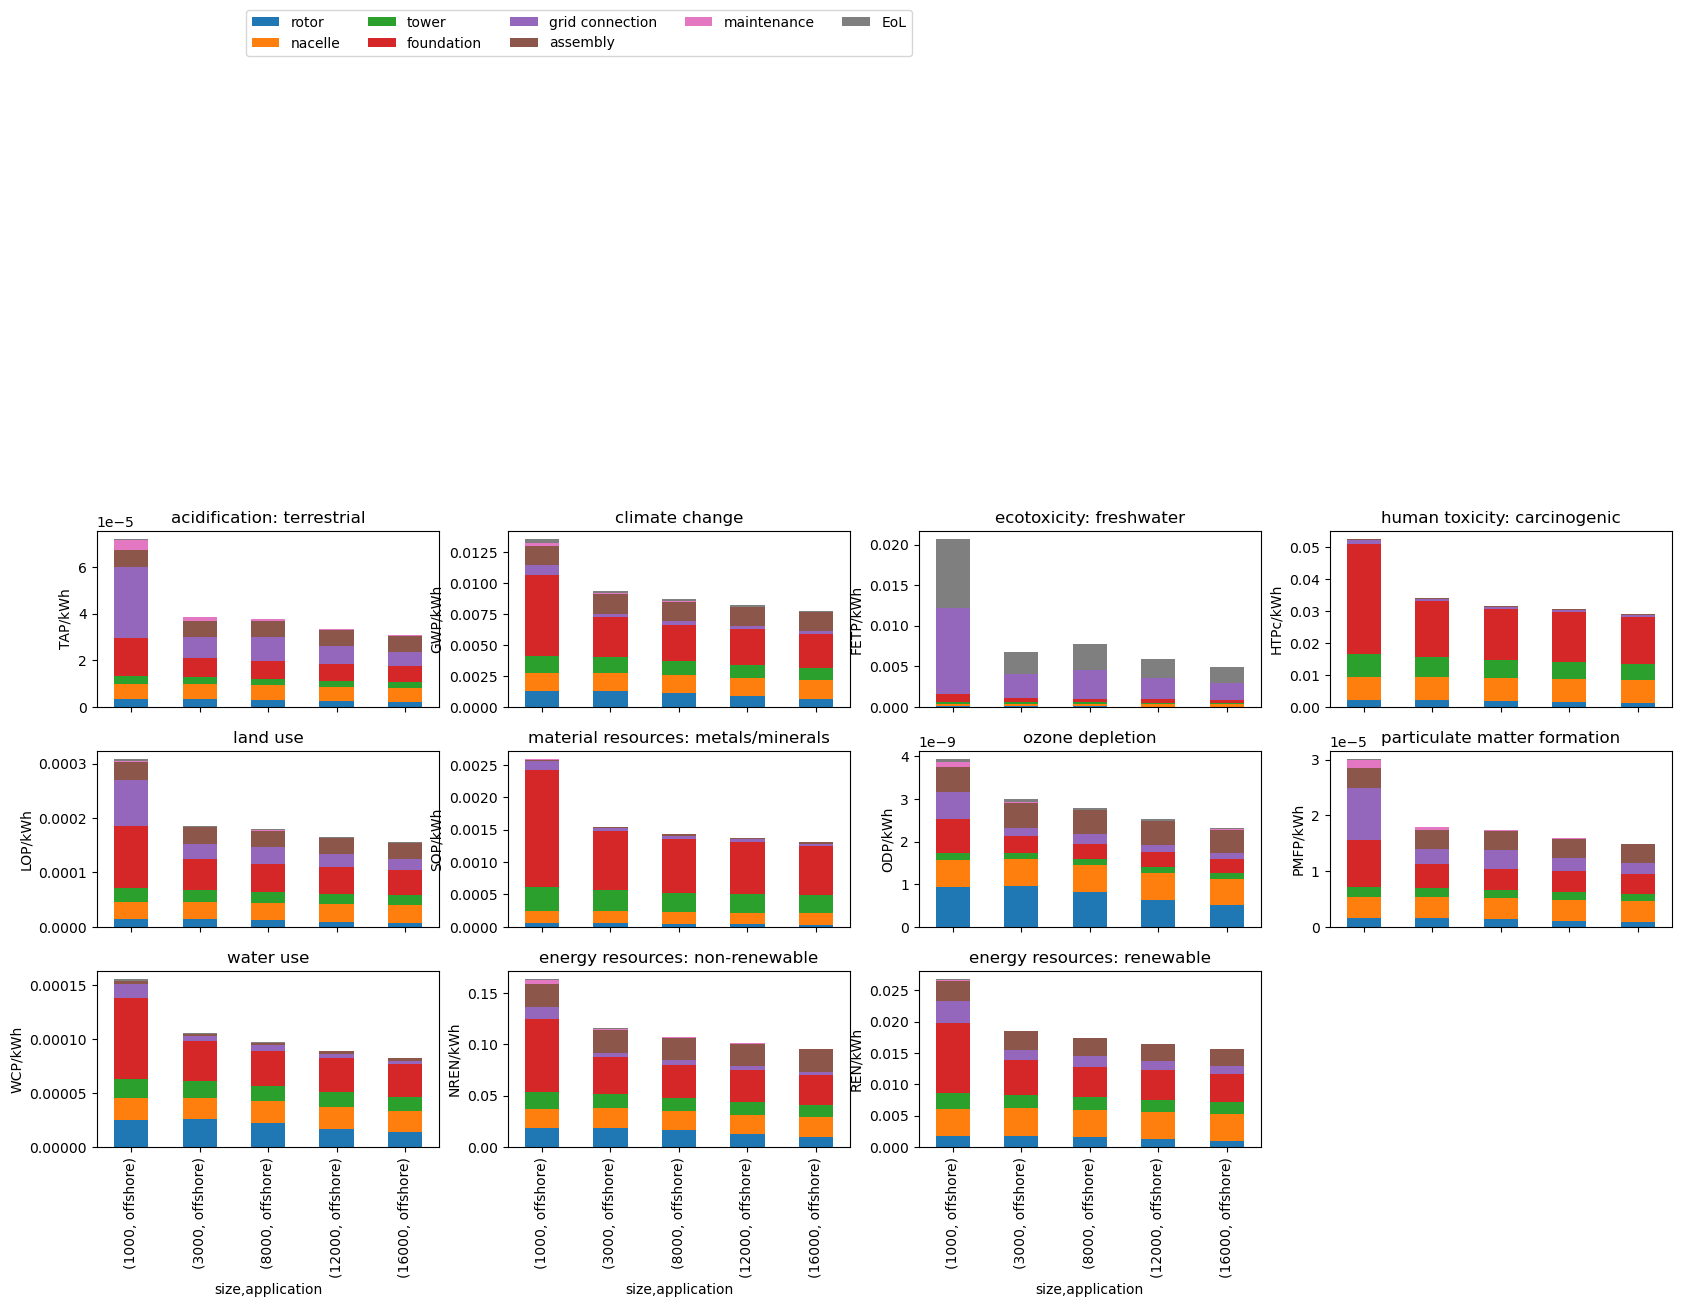

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 8),
                        sharex=True,
                        nrows=3, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       )

impacts = [
    'acidification: terrestrial',
    'climate change',
    'ecotoxicity: freshwater',
    #'ecotoxicity: marine',
    #'ecotoxicity: terrestrial',
    #'energy resources depletion: non-renewable',
    #'eutrophication: freshwater',
    #'eutrophication: marine',
    'human toxicity: carcinogenic',
    #'human toxicity: non-carcinogenic',
    #'ionising radiation',
    'land use',
    'material resources: metals/minerals',
    'ozone depletion',
    'particulate matter formation',
    #'photochemical oxidant formation: human health',
    #'photochemical oxidant formation: terrestrial ecosystems',
    'water use',
    'energy resources: non-renewable',
    'energy resources: renewable',
    #'total',
    #'Human noise impacts'
]


targets = zip([x for x in impacts], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            year=2030,
            value=0).to_dataframe("val").unstack()["val"]

    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(inv.impact_categories[key]["unit"] + "/kWh")
    ax.legend().remove()

# remove last plot
fig.delaxes(axs.flatten()[-1])

plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))
plt.tight_layout()

#make sure y axis label have enough space
plt.subplots_adjust(left=-0.15, )
plt.show()


In [ ]:
lci = inv.export_lci()

In [ ]:
import bw2data
bw2data.projects.set_current("ecoinvent-3.10-cutoff")

In [12]:
lci.apply_strategies()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.00 seconds


In [13]:
lci.match_database(fields=["name", "reference product", "unit", "location"])
lci.match_database("ecoinvent-3.10.1-cutoff", fields=["name", "reference product", "unit", "location"])

Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


In [14]:
lci.statistics()

36 datasets
312 exchanges
0 unlinked exchanges
  


(36, 312, 0)

In [16]:
if "windisch_lci_20250213_2020" in bw2data.databases:
    del bw2data.databases["windisch_lci_20250213_2020"]
lci.write_database()

Title: Writing activities to SQLite3 database:
  Started: 02/13/2025 13:53:32
  Finished: 02/13/2025 13:53:32
  Total time elapsed: 00:00:00
  CPU %: 44.60
  Memory %: 1.50
Created database: windisch_lci_20250213_2020


Brightway2 SQLiteBackend: windisch_lci_20250213_2020

In [11]:
wt["cable mass"]

<xarray.DataArray (size: 1, application: 2, year: 1, value: 1)> Size: 16B
array([[[[1.11223028e+07]],

        [[2.16740656e+02]]]])
Coordinates:
  * size         (size) int64 8B 8000
  * application  (application) <U8 64B 'offshore' 'onshore'
    parameter    <U36 144B 'cable mass'
  * year         (year) int64 8B 2020
  * value        (value) int64 8B 0